In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Source
from IPython.display import SVG

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn import tree
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [4]:
!pip install graphviz

In [36]:
os.environ["PATH"] += os.pathsep + 'M:\\MithrilData\\release\\bin'

In [37]:
DATA_DIR = 'data/'

data_files = [DATA_DIR + name for name in os.listdir(DATA_DIR)]

In [38]:
data = pd.read_csv(data_files[0], index_col=False)

for file_name in data_files[1:]:
    data = data.merge(pd.read_csv(file_name, index_col=False), 'outer')
data = data.dropna()
data.y = data.y.astype(int)

In [39]:
data.drop(['a31', 'a32', 'a33', 'g31', 'g32', 'g33'], 1, inplace=True)

In [40]:
data

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
0,6.4625,0.6349,-10.3111,-0.9379,-0.2092,0.3015,16.2286,3.4731,-15.6048,-0.7058,0.1440,0.5092,3.5509,-5.1909,3.5518,-0.7548,-0.0524,-0.6579,0
1,6.2775,0.8954,-10.2628,-0.9680,-0.1835,0.2695,16.1471,3.7145,-15.4915,-0.7014,0.1701,0.5056,3.5512,-5.1134,3.6165,-0.7727,-0.0502,-0.6564,0
2,5.9011,1.0849,-9.9960,-0.9926,-0.1779,0.2158,15.1834,3.8637,-14.4081,-0.7541,0.1760,0.4682,2.2077,-1.5814,1.7935,-0.5383,-0.1662,-0.8540,0
3,5.2266,1.0301,-9.0118,-1.0004,-0.2255,0.1845,14.7722,3.4840,-14.3134,-0.7055,0.1665,0.5048,5.5955,-4.3956,5.5846,-0.5432,-0.0632,-0.9257,0
4,5.1534,0.9434,-8.7441,-0.9399,-0.1735,0.2851,15.6377,2.8881,-15.5916,-0.6950,0.1794,0.5483,8.4182,-5.3870,7.8098,-0.6140,-0.1584,-0.7668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,11.2411,-6.9992,-9.9406,-0.9399,-0.2238,0.3701,6.9052,-6.8393,-7.2155,-0.7639,-0.1376,0.4318,10.1665,3.5670,9.9323,-0.7915,0.1918,-0.6311,1
1022,11.8757,-8.3691,-10.1669,-0.9182,-0.1777,0.3483,7.3052,-8.2694,-7.1478,-0.7692,-0.1452,0.4633,10.9996,4.3370,10.3739,-0.7866,0.1677,-0.6108,1
1023,12.2927,-9.1096,-10.3959,-0.9448,-0.1459,0.3579,7.2834,-9.1374,-7.0975,-0.7731,-0.1457,0.4645,11.5408,4.8916,10.7141,-0.7912,0.1530,-0.6135,1
1024,12.5331,-9.3198,-10.7699,-0.9431,-0.1572,0.3601,7.6534,-9.8912,-7.3730,-0.7697,-0.1242,0.4418,11.8769,5.2202,10.9720,-0.7893,0.1608,-0.6154,1


In [41]:
data[data.y == 0].describe()

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.0
mean,19.334075,0.193055,-21.499481,-0.817236,-0.220444,0.497306,26.808376,-0.778029,-24.032688,-0.500146,0.194561,0.659564,22.977127,-12.856112,19.562673,-0.659168,-0.158189,-0.676542,0.0
std,9.284875,8.975761,9.311220,0.124900,0.171090,0.146271,10.900582,12.019800,11.271230,0.135498,0.236559,0.127066,9.054896,9.778458,9.090079,0.193182,0.192187,0.201565,0.0
min,-4.856800,-20.231700,-54.350100,-1.114900,-0.648100,0.124000,0.881300,-33.304500,-45.190500,-0.778800,-0.356900,0.177900,2.207700,-28.629500,0.757600,-1.014600,-0.504600,-1.070800,0.0
25%,13.644075,-5.662975,-28.455600,-0.900950,-0.337550,0.386750,21.397625,-9.774975,-32.494950,-0.598325,0.030475,0.573975,16.488525,-20.775675,12.365625,-0.810700,-0.318525,-0.854000,0.0
50%,19.058350,0.432850,-21.158900,-0.828050,-0.205400,0.510550,27.682550,-0.445550,-24.231400,-0.495650,0.174600,0.675100,24.252600,-13.569350,19.453050,-0.709800,-0.184050,-0.686350,0.0
75%,24.804750,7.180900,-14.872025,-0.740825,-0.104175,0.600375,35.003850,7.021875,-15.476275,-0.419900,0.374925,0.755400,29.008600,-6.778225,25.657475,-0.486050,-0.031625,-0.538200,0.0
max,52.905800,21.745400,-1.617100,-0.172100,0.231900,0.951100,46.233000,22.849300,5.778000,-0.054900,0.697900,1.019000,60.714700,17.750700,61.668200,-0.200600,0.380800,-0.079300,0.0


In [42]:
data[data.y == 1].describe()

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43,y
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0
mean,4.399385,-0.648732,-3.996059,-1.014740,0.019564,0.195254,2.135120,-0.755202,-2.031956,-0.813446,0.049579,0.352582,4.944226,-0.409037,4.719936,-0.884311,0.055524,-0.461846,1.0
std,3.527052,2.128713,3.370374,0.050633,0.065235,0.101858,4.226711,1.913939,3.992674,0.050976,0.052826,0.085578,4.141567,1.648764,3.804840,0.055244,0.055927,0.092146,0.0
min,0.371900,-9.948600,-23.747500,-1.182800,-0.279000,-0.018700,-4.501000,-10.401200,-23.241400,-0.933300,-0.179400,0.203300,-2.417600,-8.712900,-1.520000,-1.066100,-0.167400,-1.252400,1.0
25%,2.705450,-1.875100,-4.245300,-1.038650,-0.010550,0.141900,-0.146900,-1.626650,-2.930450,-0.840300,0.026200,0.310850,2.325450,-1.142650,2.048400,-0.911800,0.033750,-0.485300,1.0
50%,3.362700,-0.509000,-3.074700,-1.023400,0.020500,0.176500,1.250300,-0.518300,-1.197800,-0.822900,0.054100,0.337600,4.307400,-0.313700,3.969700,-0.892300,0.061700,-0.452300,1.0
75%,4.753850,1.016550,-2.502000,-1.004000,0.049500,0.219400,3.158400,0.381400,0.061650,-0.800000,0.075350,0.370550,6.587450,0.481000,6.205350,-0.872650,0.082850,-0.421100,1.0
max,26.058300,5.874900,0.155100,-0.624200,0.443600,1.034600,23.429200,5.111500,3.292700,-0.529200,0.220400,1.154700,24.548600,5.652100,22.793400,-0.485800,0.266100,-0.242600,1.0


1: a1, a2

2: a1, a2

3: a1, a2 (corrupted now)

4: a2, a3

In [43]:
def plot_scatter(x, y, c, title=None, xlabel='', ylabel=''):
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, c=c, alpha=0.5)
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def plot_device_data(device):
    device = str(device)
    plot_scatter(data['a' + device + '1'], data['a' + device + '2'], data.y, 
                 'Device ' + device + ' angles',
                 'Angle 1, degrees',
                 'Angle 2, degrees',
                )
    plot_scatter(data['a' + device + '1'], data['a' + device + '3'], data.y,
                 'Device ' + device + ' angles',
                 'Angle 1, degrees',
                 'Angle 3, degrees',
                )
    plot_scatter(data['a' + device + '2'], data['a' + device + '3'], data.y, 
                 'Device ' + device + ' angles',
                 'Angle 2, degrees',
                 'Angle 3, degrees',
                )
    plot_scatter(data['g' + device + '1'], data['g' + device + '2'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 1, divided by g',
                 'Gravity 2, divided by g',
                )
    plot_scatter(data['g' + device + '1'], data['g' + device + '3'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 1, divided by g',
                 'Gravity 3, divided by g',
                )
    plot_scatter(data['g' + device + '2'], data['g' + device + '3'], data.y, 
                 'Device ' + device + ' gravity',
                 'Gravity 2, divided by g',
                 'Gravity 3, divided by g',
                )

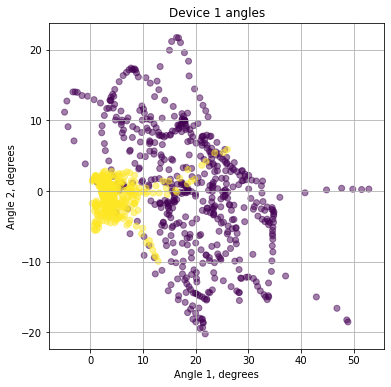

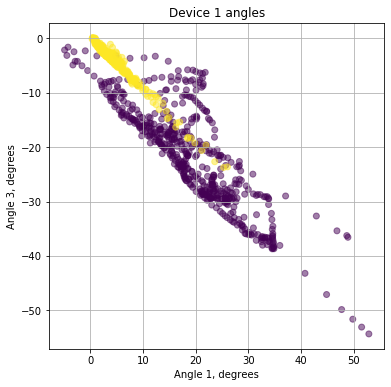

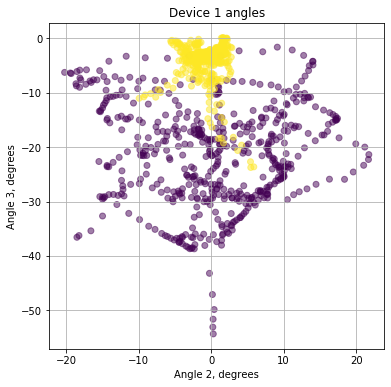

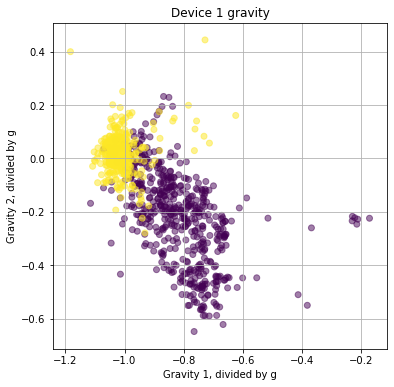

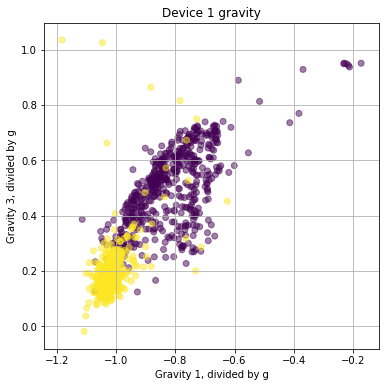

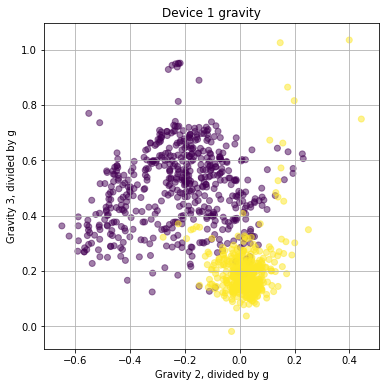

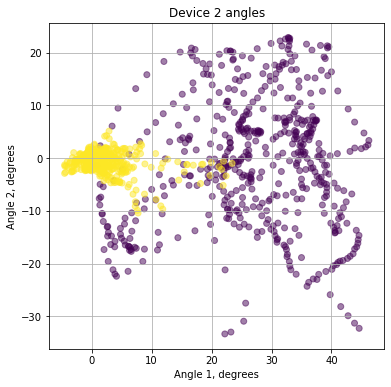

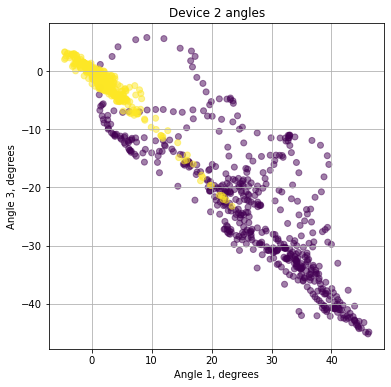

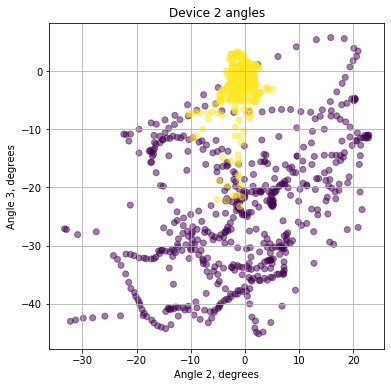

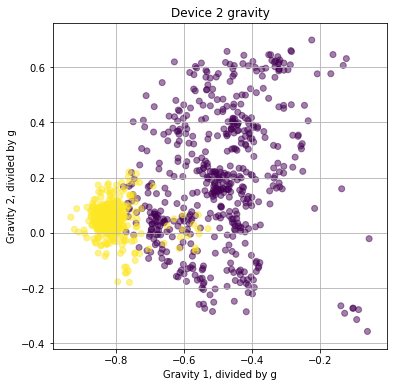

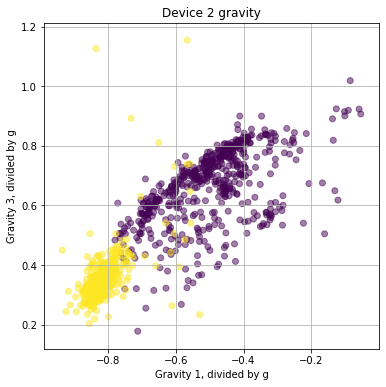

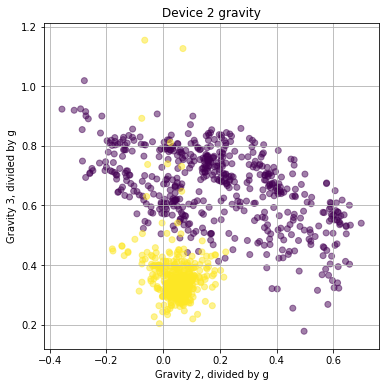

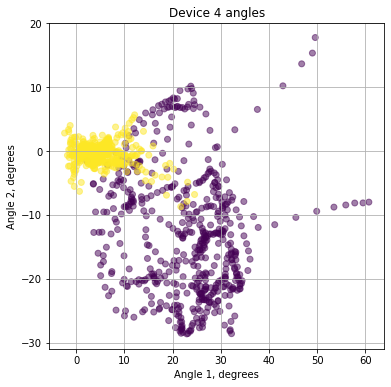

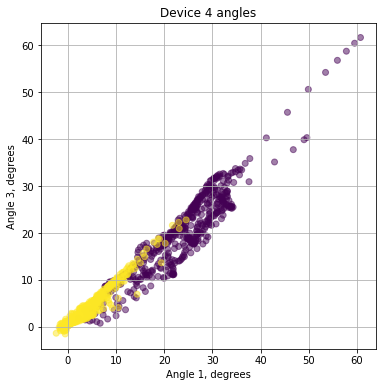

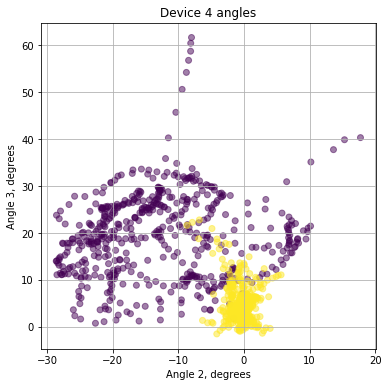

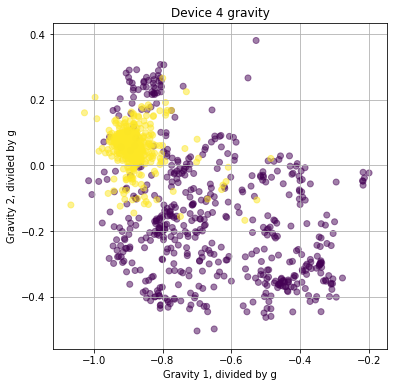

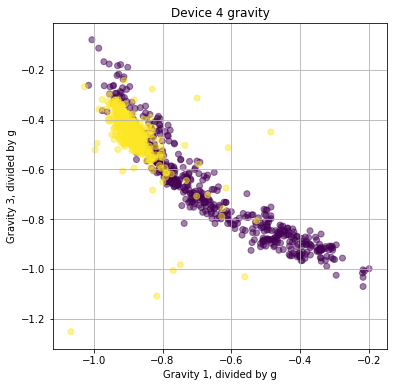

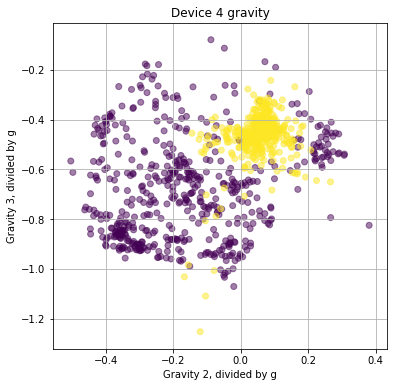

In [44]:
plot_device_data(1)
plot_device_data(2)
plot_device_data(4)

In [45]:
corr_matrix = data.corr()

In [46]:
corr_matrix['y'].sort_values(ascending=False)

y      1.000000
a23    0.789085
a13    0.776984
g12    0.675300
a42    0.658032
g42    0.597232
g43    0.561014
a22    0.001306
a12   -0.063458
g22   -0.384657
g41   -0.615707
g11   -0.715488
a11   -0.724242
a43   -0.725092
g13   -0.766030
a41   -0.784967
g23   -0.815384
a21   -0.827592
g21   -0.834005
Name: y, dtype: float64

In [47]:
X = data.drop('y', 1)
y = data.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X_train

,a11,a12,a13,g11,g12,g13,a21,a22,a23,g21,g22,g23,a41,a42,a43,g41,g42,g43
867,1.1221,-2.2845,-1.0615,-1.0275,0.0134,0.2006,-1.3394,-0.1430,1.2360,-0.8273,0.0805,0.3217,1.3959,1.3906,1.0983,-0.8803,0.0664,-0.4702
750,5.5719,-3.6800,-3.9333,-1.0100,-0.0412,0.2250,3.1998,-4.6743,-3.7608,-0.8151,-0.0087,0.3974,11.3600,1.9185,10.2163,-0.8417,0.0649,-0.5407
212,26.1334,-0.1430,-30.5933,-0.7253,-0.0864,0.7246,43.0886,1.2699,-42.2942,-0.3198,0.1804,0.8215,25.5126,-22.1758,15.7642,-0.3720,-0.4147,-0.8469
79,28.7630,2.8308,-34.4581,-0.8034,-0.1181,0.6093,39.6051,-3.0398,-39.2902,-0.5124,0.1694,0.7446,29.3391,-21.9602,22.1149,-0.4592,-0.3605,-0.8239
148,18.2433,3.3670,-23.1570,-0.9440,-0.0173,0.3886,35.3129,4.1064,-30.2956,-0.5969,0.3894,0.5932,17.4880,-23.7065,10.4558,-0.7187,-0.3891,-0.6384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,3.0657,-0.2355,-3.1911,-1.0390,-0.0166,0.1464,-0.9142,-0.8858,0.6694,-0.8190,0.0275,0.3227,6.3020,0.5450,6.4127,-0.8947,0.0783,-0.4582
71,33.1417,-2.7297,-36.5553,-0.7624,-0.2275,0.6621,41.1784,-11.4497,-40.6816,-0.4387,0.0251,0.7856,33.4264,-18.1458,26.9376,-0.3330,-0.3522,-0.9189
106,26.5885,-6.8927,-28.3129,-0.6921,-0.4016,0.4909,29.1934,-9.9703,-30.7592,-0.5927,-0.1757,0.7441,22.7786,-8.6196,21.7947,-0.4936,0.0139,-0.8876
271,17.4208,10.9684,-23.1682,-0.8171,-0.0610,0.6262,27.2368,4.7711,-21.3781,-0.3962,0.3896,0.7280,30.5393,-12.5103,29.2565,-0.7199,-0.1469,-0.6962


In [49]:
ridge = RidgeClassifier(random_state=42)#(penalty='l2', alpha=0.1, random_state=42)
ridge.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=42, solver='auto',
                tol=0.001)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(ridge.predict(X_test), y_test)

1.0

In [51]:
sorted(list(zip(data.columns, ridge.coef_[0])), key=lambda x : x[1], reverse=True)

[('g12', 2.8554601233273305),
 ('g42', 0.11188106382535042),
 ('a43', 0.024709358616575885),
 ('a11', 0.016800451155227002),
 ('a13', 0.004963492299943795),
 ('a22', -0.00045182152952615896),
 ('a23', -0.0004781798115664423),
 ('a12', -0.0017718494426731599),
 ('a42', -0.004182955885098644),
 ('a21', -0.020194162050128545),
 ('a41', -0.023552119891746555),
 ('g43', -0.08330734186992916),
 ('g13', -0.10047115137730103),
 ('g21', -0.31129827162382256),
 ('g23', -0.5720776019162365),
 ('g41', -0.6561265613360561),
 ('g11', -0.7666954219879777),
 ('g22', -1.8663356737946069)]

In [72]:
#print((np.array(X_test) @ ridge.coef_[0] > 0) == np.array(y_test))

In [53]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [54]:
accuracy_score(dtree.predict(X_test), y_test)

0.9793510324483776

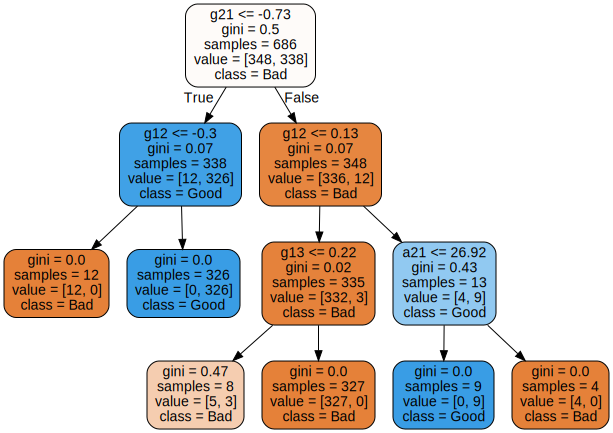

In [71]:
from IPython.display import SVG
graph = Source( tree.export_graphviz(dtree, out_file=None, feature_names=X.columns, rounded=True, proportion=False, 
                precision=2, filled=True, class_names=['Bad', 'Good']))
SVG(graph.pipe(format='svg'))